In [13]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

In [14]:
# preprocessing functions
def one_hot (sentence):
    
    vocabulary = ['а','б','в','г','д','е','ё','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я',
              'А','Б','В','Г','Д','Е','Ё','Ж','З','И','Й','К','Л','М','Н','О','П','Р','С','Т','У','Ф','Х','Ц','Ч','Ш','Щ','Ъ','Ы','Ь','Э','Ю','Я',
             '!','@','#','$','%','^','&','*','(',')',':',';','/',',','.','%','№','?','~','-','+','=',' ',
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    result = np.zeros((1,len(vocabulary)))
    for char in sentence:
        if char in vocabulary:
            vector = np.zeros((1,len(vocabulary)))
            vector[0, vocabulary.index(char)] = 1
            result = np.concatenate((result, vector)) 
            
    result = np.delete(result, (0), axis=0)
    #encoded = one_hot(sentence)
    num_of_lett = 300
    if len(result)<num_of_lett:
        result = np.concatenate((result, np.zeros((num_of_lett-result.shape[0],result.shape[1]))))
    if len(result)>num_of_lett:
        result = result[:num_of_lett,:]
    return result
            
def char_to_vocab (sentence):
    vocabulary = ['а','б','в','г','д','е','ё','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я',
              'А','Б','В','Г','Д','Е','Ё','Ж','З','И','Й','К','Л','М','Н','О','П','Р','С','Т','У','Ф','Х','Ц','Ч','Ш','Щ','Ъ','Ы','Ь','Э','Ю','Я',
             '!','@','#','$','%','^','&','*','(',')',':',';','/',',','.','%','№','?','~','-','+','=',' ',
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    result = []
    for char in sentence:
        if char in vocabulary:
            result.append(vocabulary.index(char)+1)
            
    result = np.array(result)
    #encoded = one_hot(sentence)
    num_of_lett = 300
    if len(result)<num_of_lett:
        result = np.concatenate((result, np.zeros(num_of_lett-result.shape[0])))
    if len(result)>num_of_lett:
        result = result[:num_of_lett]
    return list(result)
#char_to_vocab(X_train[1])
#X_train[0]

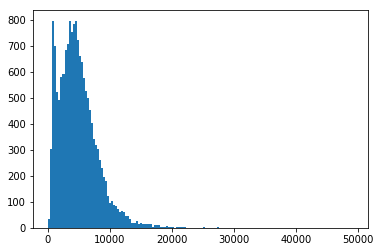

,Unnamed: 0,date,likes,photos,texts
0,0,1508585255,1976,https://pp.userapi.com/c7002/v7002908/3a5c5/yC...,Один из самых интересных пунктов в изучении ин...
1,1,1508580588,1465,https://pp.userapi.com/c7002/v7002604/3aff0/Jt...,Специалисты по кибербезопасности рассказывают ...
2,2,1508576733,6350,https://pp.userapi.com/c7002/v7002044/3a8ae/YB...,"Дамы и господа, представляем вам главу комитет..."
3,3,1508573167,6113,https://pp.userapi.com/c7002/v7002060/3a76a/gx...,Рисунок Трампа был продан на аукционе за $16 0...
5,5,1508564728,4289,https://pp.userapi.com/c7002/v7002106/3ac9b/VE...,Специалисты Стэнфордского университета создали...
6,6,1508562082,5250,https://pp.userapi.com/c7002/v7002099/3a751/Lf...,Квартиру дочери Собянина арестовали за долги. ...
7,7,1508536796,994,https://pp.userapi.com/c837231/v837231758/55f2...,"Павел Додонов — гитарист, электронный музыкант..."
8,8,1508534250,776,https://pp.userapi.com/c841222/v841222297/2ad3...,• ЦБ введёт правила для выдачи кредитов выше 7...
9,9,1508532746,4539,https://pp.userapi.com/c7002/v7002002/39e72/yw...,На православном форуме в Краснодаре рассказали...
10,10,1508532027,3800,https://pp.userapi.com/c639224/v639224297/5249...,Биржевой курс биткоина обновил исторический ре...


In [11]:
data = pd.read_csv('Dataset/dataset_raw.csv')
plt.hist(data.likes,bins = 150)
plt.show()
data.likes.mean()
data[data.likes < 10000].


In [56]:
data.likes = data.likes/data.likes.max()

pic_names = os.listdir('Dataset/images/')
msk = np.random.rand(len(pic_names)) < 0.8
train_names = np.array(pic_names)[msk]
val_names = np.array(pic_names)[~msk]

msk = np.random.rand(len(val_names)) < 0.5
test_names = val_names[msk]
val_names = val_names[~msk]

print(train_names.shape)
print(val_names.shape)
print(test_names.shape)

(12643,)
(1520,)
(1551,)


In [57]:
#data_lett = pd.read_csv('Dataset/dataset_raw.csv')
X = data.texts.values

#np.isnan(np.nan)

X_test = []
y_test = []
id_test = []

for name in test_names:
    cache = data.iloc[int(name[:-4])]
    if type(cache.texts) == type('a'):
        id_test.append(name)
        X_test.append(cache.texts)
        y_test.append(cache.likes)

X_val = []
y_val = []
id_val = []
for name in val_names:
    cache = data.iloc[int(name[:-4])]
    if type(cache.texts) == type('a'):
        id_val.append(name)
        X_val.append(cache.texts)
        y_val.append(cache.likes)
        
X_train = []
y_train = []
id_train = []
for name in train_names:
    cache = data.iloc[int(name[:-4])]
    if type(cache.texts) == type('a'):
        id_train.append(name)
        X_train.append(cache.texts)
        y_train.append(cache.likes)
        
        
print('train dataset: '+str(len(id_train)))
print('val dataset: '+str(len(id_val)))
print('test dataset: '+str(len(id_test)))
# X_ = []
# y_ = []


# for i in range(len(X)):
#     if type(X[i])==type('a'):
#         X_.append(X[i])
#         y_.append(y[i])
        
# print(len(X_))
# print(len(y_))

train dataset: 12473
val dataset: 1497
test dataset: 1533


In [ ]:
len_X =[]
for i in X:
    len_X.append(len(i))
plt.hist(len_X, bins =100)
plt.show()

In [58]:
X_train_encoded = []
for sentence in tqdm(X_train):
    X_train_encoded.append(char_to_vocab(sentence))
#X_train_encoded = np.array(X_train_encoded)

X_val_encoded = []
for sentence in tqdm(X_val):
    X_val_encoded.append(char_to_vocab(sentence))
#X_val_encoded = np.array(X_val_encoded)

X_test_encoded = []
for sentence in tqdm(X_test):
    X_test_encoded.append(char_to_vocab(sentence))
#X_test_encoded = np.array(X_test_encoded)

100%|██████████| 1533/1533 [00:00<00:00, 3582.65it/s]


In [47]:
X_val_encoded

array([[ 46.,   6.,  15., ...,  16.,  19.,  20.],
       [ 51.,  16.,  19., ...,   0.,   0.,   0.],
       [ 36.,  89.,  50., ...,  20.,  21.,   5.],
       ..., 
       [ 34.,  13.,   4., ...,   0.,   0.,   0.],
       [ 51.,  16.,  19., ...,   0.,   0.,   0.],
       [ 54.,  25.,   6., ...,   0.,   0.,   0.]])

In [59]:
data_test = {'id':id_test, 'texts':X_test, 'likes':y_test}
dataset_test = pd.DataFrame(data_test)
with open ('Dataset/dataset_test.pkl', 'wb') as f:
    pickle.dump(dataset_test, f)
#dataset_test.to_csv('Dataset/dataset_test.csv', encoding='utf-8')

data_val = {'id':id_val, 'texts':X_val, 'likes':y_val}
dataset_val = pd.DataFrame(data_val)
with open ('Dataset/dataset_val.pkl', 'wb') as f:
    pickle.dump(dataset_val, f)
#dataset_val.to_csv('Dataset/dataset_val.csv',encoding='utf-8')

data_train = {'id':id_train, 'texts':X_train, 'likes':y_train}
dataset_train = pd.DataFrame(data_train)
with open ('Dataset/dataset_train.pkl', 'wb') as f:
    pickle.dump(dataset_train, f)
#dataset_train.to_csv('Dataset/dataset_train.csv',encoding='utf-8')

In [52]:

dataset_train.texts.values[0]

[116.0,
 103.0,
 96.0,
 94.0,
 101.0,
 108.0,
 89.0,
 90.0,
 103.0,
 93.0,
 89.0,
 116.0,
 98.0,
 107.0,
 112.0,
 90.0,
 111.0,
 94.0,
 108.0,
 89.0,
 89.0,
 108.0,
 105.0,
 90.0,
 92.0,
 94.0,
 86.0,
 107.0,
 104.0,
 92.0,
 100.0,
 86.0,
 17.0,
 18.0,
 16.0,
 6.0,
 12.0,
 20.0,
 89.0,
 16.0,
 20.0,
 89.0,
 2.0,
 29.0,
 3.0,
 26.0,
 6.0,
 4.0,
 16.0,
 89.0,
 21.0,
 25.0,
 1.0,
 19.0,
 20.0,
 15.0,
 10.0,
 12.0,
 1.0,
 89.0,
 4.0,
 18.0,
 21.0,
 17.0,
 17.0,
 29.0,
 89.0,
 117.0,
 101.0,
 98.0,
 103.0,
 100.0,
 86.0,
 89.0,
 53.0,
 16.0,
 14.0,
 1.0,
 89.0,
 38.0,
 6.0,
 13.0,
 16.0,
 15.0,
 4.0,
 1.0,
 81.0,
 91.0,
 107.0,
 91.0,
 107.0,
 36.0,
 18.0,
 6.0,
 14.0,
 33.0,
 89.0,
 12.0,
 16.0,
 19.0,
 14.0,
 16.0,
 19.0,
 1.0,
 89.0,
 10.0,
 89.0,
 13.0,
 32.0,
 2.0,
 3.0,
 10.0,
 67.0,
 91.0,
 107.0,
 91.0,
 107.0,
 53.0,
 18.0,
 1.0,
 5.0,
 10.0,
 24.0,
 10.0,
 16.0,
 15.0,
 15.0,
 29.0,
 11.0,
 89.0,
 69.0,
 18.0,
 1.0,
 5.0,
 10.0,
 16.0,
 13.0,
 6.0,
 15.0,
 20.0,
 1.0,
 25.0,
 0.0,